Count per team:
 Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
NaN                      43
Name: Team, dtype: int64

Average teams salaries:
                             Salary
                              mean
Team                              
Business Development  91866.316832
Client Services       88224.424528
Distribution          88500.466667
Engineering           94269.195652
Finance               92219.480392
Human Resources       90944.527473
Legal                 89303.613636
Marketing             90435.591837
Product               88665.505263
Sales                 92173.436170

Dataframe after the change:
                      Team        Salary
0               Marketing  90435.591837
1                     NaN           NaN
2                 F

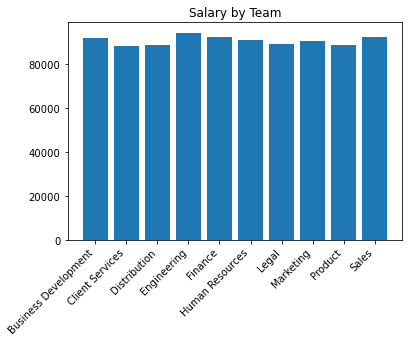

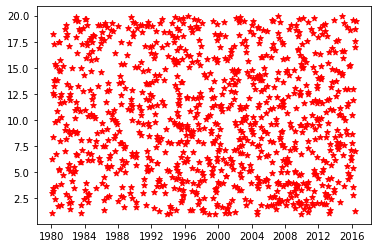

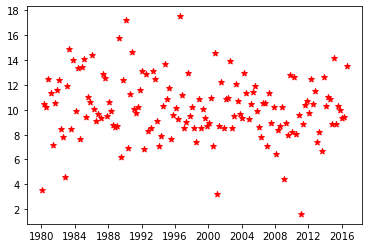

In [1]:
#Data Processing Assignment 4 
#Glenn Haag 7/21/2021

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#load the data to a dataframe
csv_df = pd.read_csv("employees.csv")
#count how many employees per team
count_per_team = csv_df['Team'].value_counts(dropna = False)
print("Count per team:\n", count_per_team)

#get average teams salaries values
teams_salaries = csv_df.groupby(['Team']).agg({'Salary': ['mean']})
csv_df['Salary']= csv_df.groupby(by = ['Team'])['Salary'].transform('mean')
print("\nAverage teams salaries:\n", teams_salaries)
print("\nDataframe after the change:\n",csv_df[['Team', 'Salary']])

#create bar chart
teams_salaries.reset_index()
y_pos = np.arange(len(teams_salaries['Salary']))
bar_chart = plt.figure(1)
plt.bar(y_pos, teams_salaries['Salary'].squeeze())
plt.xticks(y_pos, teams_salaries.index.values , rotation = 45, ha = 'right')
plt.title("Salary by Team")

#change start date column to datetime
csv_df["Start Date"] = pd.to_datetime(csv_df["Start Date"])
sc_plt = plt.figure(2)
#create scatter plot and change color to red and marker to a star
plt.scatter(csv_df["Start Date"], csv_df["Bonus %"], color = "r", marker = '*')
plt.show()

#print all bonuses before 1/1/2008
cutoff_dt = "01/01/2008"
cutoff = datetime.datetime.strptime(cutoff_dt,"%m/%d/%Y")
count = 0
for index, x in csv_df.iterrows():
    if x["Start Date"] < cutoff:
        #removed print statement for readability
        #print(count, x['Bonus %'])
        count += 1
        
#resample and make new scatter plot        
resample_ts = plt.figure(3)
df = csv_df.resample('3M', on='Start Date').mean()
plt.scatter(df.reset_index()['Start Date'], df["Bonus %"], color = 'r', marker = '*')
plt.show()

